<a href="https://colab.research.google.com/github/pinellolab/crispr-bean/blob/main/docs/visualize_var.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install -U kaleido

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import logging
import plotly.express as px
logging.getLogger('matplotlib.font_manager').disabled = True

In [3]:
try:
    scores_tbl = pd.read_csv("../tests/data/var_res_example/bean_element_result.MixtureNormal+Acc.csv")
except:
    os.system("wget https://raw.githubusercontent.com/pinellolab/crispr-bean/main/tests/data/var_res_example/bean_element_result.MixtureNormal+Acc.csv")
    scores_tbl = pd.read_csv("bean_element_result.MixtureNormal+Acc.csv")

In [4]:
scores_tbl

,Unnamed: 0,target,target_variant,target_group,target_group2,n_guides,edit_rate_mean,edit_rate_std,mu,mu_sd,...,mu_sd_scaled,mu_z_scaled,sd_scaled,novl_scaled,mu_adj,mu_sd_adj,mu_z_adj,novl_adj,CI[0.025,0.975]
0,0,1:198994696TAT_Maj_ABE_1,1:198994696TAT,Variant,Variant,4,0.010273,0.013362,-0.385880,0.920580,...,0.744880,-0.402463,0.810453,0.186337,-0.385880,2.087246,-0.184875,0.350261,-4.476806,3.705047
1,1,2:62866173TAT_Maj_ABE_12,2:62866173TAT,Variant,Variant,5,0.433628,0.089953,-0.843894,0.588320,...,0.476034,-1.408272,0.810774,0.454148,-0.843894,1.333906,-0.632649,0.302086,-3.458303,1.770514
2,2,2:118868389AAACA_Maj_ABE_8,2:118868389AAACA,Variant,Variant,5,0.030458,0.047397,-0.551011,0.944183,...,0.763978,-0.567296,0.810062,0.221399,-0.551011,2.140760,-0.257391,0.369167,-4.746824,3.644802
3,3,2:118873095TAACTCT_Maj_ABE_9,2:118873095TAACTCT,Variant,Variant,5,0.002222,0.001557,0.182452,1.215923,...,0.983855,0.162701,0.810410,0.064634,0.182452,2.756881,0.066180,0.453851,-5.220936,5.585839
4,4,2:164588224GAG_Maj_ABE_10,2:164588224GAG,Variant,Variant,5,0.116386,0.141857,-0.481787,0.787499,...,0.637199,-0.592263,0.810809,0.266669,-0.481787,1.785510,-0.269832,0.296102,-3.981322,3.017747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,689,rs551641295_Maj_ABE_230,rs551641295,Variant,Variant,5,0.147445,0.096167,2.399288,0.644782,...,0.521720,3.744941,0.809187,0.813649,2.399288,1.461923,1.641186,0.678923,-0.466029,5.264605
690,690,rs569255498_Maj_ABE_236,rs569255498,Variant,Variant,5,0.382273,0.066261,-1.486694,0.512715,...,0.414860,-2.869650,0.809790,0.655515,-1.486694,1.162488,-1.278890,0.510790,-3.765128,0.791740
691,691,rs573638413_Maj_ABE_239,rs573638413,Variant,Variant,5,0.118029,0.068900,0.216656,1.052363,...,0.851512,0.220491,0.806723,0.106352,0.216656,2.386039,0.090801,0.398343,-4.459895,4.893206
692,692,rs751373206_Min_ABE_557,rs751373206,Variant,Variant,5,0.563968,0.138646,-1.197128,0.272471,...,0.220468,-4.337156,0.811250,0.737159,-1.197128,0.617777,-1.937800,0.562122,-2.407949,0.013693


* mu_adj: mean effect sizes after adjusting for confidence with negative control target.
* mu_z_adj: Z-score after adjusting for the confidence with negative control target.
* CI[0.025, 0.975]: 95% credible interval of mu_adj. If the credible interval *does not* contain 0, we can call it significant.

In [5]:
scores_tbl = scores_tbl.drop("Unnamed: 0", axis=1)

In [6]:
hits = scores_tbl.loc[scores_tbl["CI[0.025"]*scores_tbl["0.975]"] > 0].sort_values("mu_z_adj")

In [7]:
hits

,target,target_variant,target_group,target_group2,n_guides,edit_rate_mean,edit_rate_std,mu,mu_sd,mu_z,...,mu_sd_scaled,mu_z_scaled,sd_scaled,novl_scaled,mu_adj,mu_sd_adj,mu_z_adj,novl_adj,CI[0.025,0.975]
74,LDLR_SD_12,LDLR,PosCtrl,PosCtrl_dec,5,0.605040,0.145153,-1.706433,0.108347,-15.749651,...,0.087668,-15.607696,0.808953,0.919333,-1.706433,0.245658,-6.946385,0.871242,-2.187914,-1.224953
65,LDLR_SA_4,LDLR,PosCtrl,PosCtrl_dec,5,0.503645,0.118360,-1.542085,0.102661,-15.021137,...,0.083067,-14.871318,0.806589,0.910528,-1.542085,0.232765,-6.625074,0.848001,-1.998295,-1.085874
71,LDLR_SD_9,LDLR,PosCtrl,PosCtrl_dec,5,0.631704,0.168399,-1.502086,0.110918,-13.542281,...,0.089749,-13.403617,0.807820,0.900927,-1.502086,0.251487,-5.972825,0.829719,-1.994991,-1.009181
69,LDLR_SA_8,LDLR,PosCtrl,PosCtrl_dec,5,0.677679,0.095749,-1.434610,0.106445,-13.477464,...,0.086129,-13.332972,0.804226,0.898942,-1.434610,0.241345,-5.944237,0.821906,-1.907637,-0.961583
75,LDLR_SD_13,LDLR,PosCtrl,PosCtrl_dec,4,0.398683,0.055129,-1.332742,0.112924,-11.802161,...,0.091371,-11.665959,0.812314,0.884886,-1.332742,0.256033,-5.205345,0.790877,-1.834558,-0.830926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,LSS_SD_17,LSS,PosCtrl,PosCtrl_inc,5,0.756689,0.102192,2.903474,0.514785,5.640168,...,0.416534,5.670045,0.811119,0.914108,2.903474,1.167180,2.487596,0.820393,0.615842,5.191105
119,SREBF2_SA_61,SREBF2,PosCtrl,PosCtrl_dec,5,0.673108,0.025410,3.070172,0.541486,5.669898,...,0.438140,5.698302,0.812419,0.924849,3.070172,1.227720,2.500709,0.833013,0.663884,5.476460
433,rs8126001_Min_ABE_574,rs8126001,Variant,Variant,5,0.287359,0.140826,3.152660,0.531068,5.936458,...,0.429709,5.965419,0.806982,0.933783,3.152660,1.204098,2.618275,0.848244,0.792671,5.512649
568,rs35081008_Min_ABE_465,rs35081008,Variant,Variant,5,0.489127,0.176691,2.093390,0.346032,6.049693,...,0.279990,6.094141,0.810424,0.855572,2.093390,0.784565,2.668218,0.761694,0.555671,3.631109


In [8]:
hits.loc[hits.target_group != "PosCtrl"]

,target,target_variant,target_group,target_group2,n_guides,edit_rate_mean,edit_rate_std,mu,mu_sd,mu_z,...,mu_sd_scaled,mu_z_scaled,sd_scaled,novl_scaled,mu_adj,mu_sd_adj,mu_z_adj,novl_adj,CI[0.025,0.975]
529,rs12949541_Maj_ABE_68,rs12949541,Variant,Variant,5,0.721277,0.149108,-1.135827,0.196916,-5.768071,...,0.159333,-5.689964,0.807244,0.789736,-1.135827,0.446471,-2.544008,0.620749,-2.010894,-0.260759
270,rs2251219_Maj_ABE_138,rs2251219,Variant,Variant,5,0.616719,0.121485,-1.186437,0.206637,-5.741662,...,0.167198,-5.667229,0.809184,0.788065,-1.186437,0.468510,-2.532360,0.625374,-2.104701,-0.268174
505,rs12042481_Maj_ABE_54,rs12042481,Variant,Variant,5,0.428433,0.142262,-1.160192,0.206813,-5.609867,...,0.167341,-5.535498,0.807585,0.784391,-1.160192,0.468910,-2.474232,0.616634,-2.079238,-0.241145
672,rs146351794_Maj_ABE_90,rs146351794,Variant,Variant,5,0.427360,0.204787,-1.220160,0.228191,-5.347098,...,0.184639,-5.279697,0.808812,0.775184,-1.220160,0.517381,-2.358338,0.612710,-2.234209,-0.206111
459,rs10415758_Min_ABE_357,rs10415758,Variant,Variant,5,0.406099,0.208473,-1.104312,0.214755,-5.142182,...,0.173768,-5.070563,0.810723,0.770044,-1.104312,0.486919,-2.267960,0.588819,-2.058655,-0.149969
389,rs6602909_Maj_ABE_260,rs6602909,Variant,Variant,5,0.427919,0.246049,-1.299049,0.253306,-5.128376,...,0.204961,-5.067657,0.804659,0.768025,-1.299049,0.574325,-2.261871,0.614217,-2.424705,-0.173393
41,CONTROL_12,CONTROL,NegCtrl,NegCtrl,5,0.771117,0.143726,-1.117003,0.219743,-5.083233,...,0.177803,-5.013240,0.807760,0.767486,-1.117003,0.498226,-2.241960,0.587318,-2.093508,-0.140498
578,rs41269888_Maj_ABE_204,rs41269888,Variant,Variant,5,0.635011,0.066828,-1.425502,0.285185,-4.998512,...,0.230756,-4.944580,0.810015,0.767121,-1.425502,0.646605,-2.204594,0.627287,-2.692826,-0.158179
197,rs643257_Min_ABE_536,rs643257,Variant,Variant,5,0.783031,0.067588,-1.122906,0.229713,-4.888294,...,0.185871,-4.821339,0.804576,0.759866,-1.122906,0.520833,-2.155983,0.578235,-2.143719,-0.102093
34,CONTROL_5,CONTROL,NegCtrl,NegCtrl,5,0.390641,0.154378,-1.292665,0.276072,-4.682340,...,0.223382,-4.626628,0.811441,0.750495,-1.292665,0.625943,-2.065147,0.591654,-2.519492,-0.065838


In [9]:
pal = sns.color_palette()
target_group2_pal = {"NegCtrl":pal[-3], "PosCtrl_inc":pal[3], "PosCtrl_dec":pal[0], "Variant": pal[-2]}

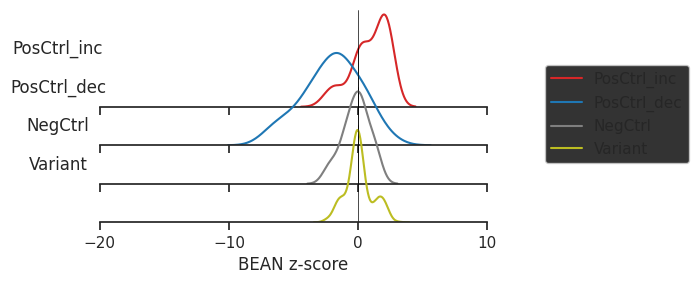

In [10]:
sns.set_theme(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)})
fig, ax = plt.subplots(4, 1, figsize=(5,4), sharex=True)

for i, g in enumerate(['PosCtrl_inc', 'PosCtrl_dec', 'NegCtrl', 'Variant']):
    sns.kdeplot(scores_tbl.loc[scores_tbl.target_group2 == g], x = "mu_z_adj", hue='target_group2', palette=target_group2_pal, ax = ax[i], label = g)
    ax[i].axvline(0, c = 'black', linewidth=0.5)
    ax[i].get_legend().remove()
    ax[i].set_ylabel(g, rotation=0, labelpad=30, )
    ax[i].spines[['right', 'top', 'left']].set_visible(False)
    ax[i].set_box_aspect(0.25)
ax[0].set_xticks([-20, -10, 0, 10])
fig.legend(bbox_to_anchor=(1, 0.5), loc="center left")
ax[-1].set_xlabel("BEAN z-score")
plt.setp(ax, yticks=[])
fig.subplots_adjust(hspace=-0.8)
fig.savefig("control_distributions_Ridge.pdf", bbox_inches="tight")

In [11]:
target_group2_plotly_pal = {"NegCtrl":"grey", "PosCtrl_inc":"red", "PosCtrl_dec":"blue", "Variant": "goldenrod"}

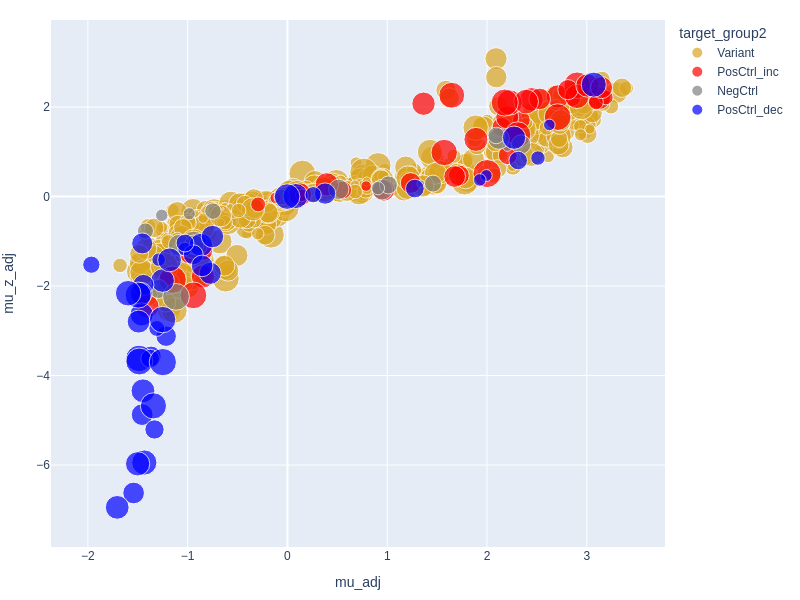

In [12]:
fig = px.scatter(scores_tbl, x = 'mu_adj', y= "mu_z_adj", size='edit_rate_mean', color = "target_group2", color_discrete_map=target_group2_plotly_pal, width=800, height=600)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
)
# For github
fig.show('png')
# Interactive visualization with notebook, run:
# fig.show()

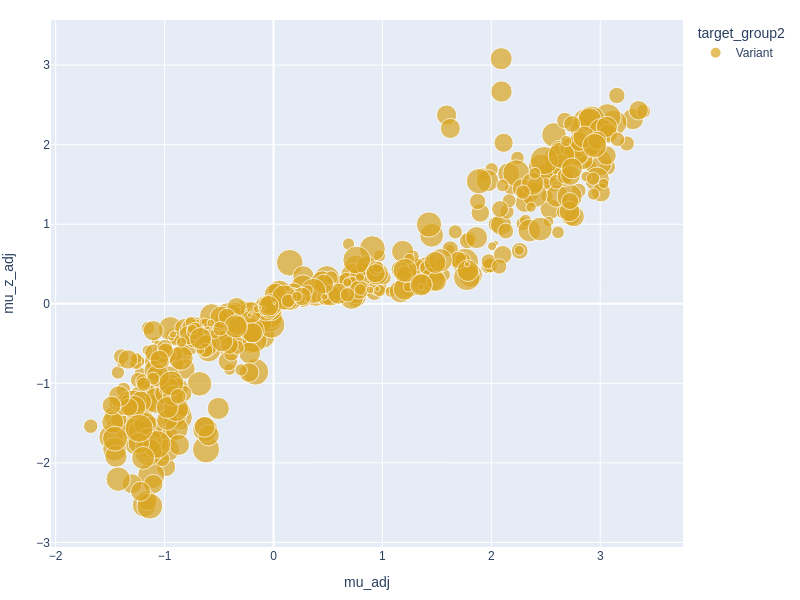

In [13]:
import plotly.express as px
fig = px.scatter(scores_tbl.loc[scores_tbl.target_group == "Variant", :], x = 'mu_adj', y= "mu_z_adj", size='edit_rate_mean', color = "target_group2", color_discrete_map=target_group2_plotly_pal, width=800, height=600)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
)
# For github
fig.show('png')
# Interactive visualization with notebook, run:
# fig.show()